## **Conclusion**

1. For this model, it cannot be used for business decisions. It is not strong enough to be a preductor, as the _recall score_ being 64% and the _precision_ being 68% for churned user.

2. `activity_days` is the most important variable in this model. It was also known from EDA having a negative correlation with churn. And the coeficient constant of `activity_days` is  at least 30 times larger than other variables.

3. To improve the  model, it would be helpful to have drive-level information for each user, such as drive times, geographic locations, etc. Or the interaction between user adn app like how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs.

In [1]:
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression



In [2]:
# Load the dataset by running this cell

df = pd.read_csv('waze_dataset.csv')

In [3]:
print(df.shape)
print(df.info())

(14999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB
None


In [4]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Use `.drop()` to remove the ID column since we don't need this information for your analysis.

In [5]:
df = df.drop("ID", axis = 1)

Now, check the class balance of the dependent (target) variable, `label`.

In [6]:
df["label"].value_counts(normalize = True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

Call `.describe()` on the data.


In [7]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


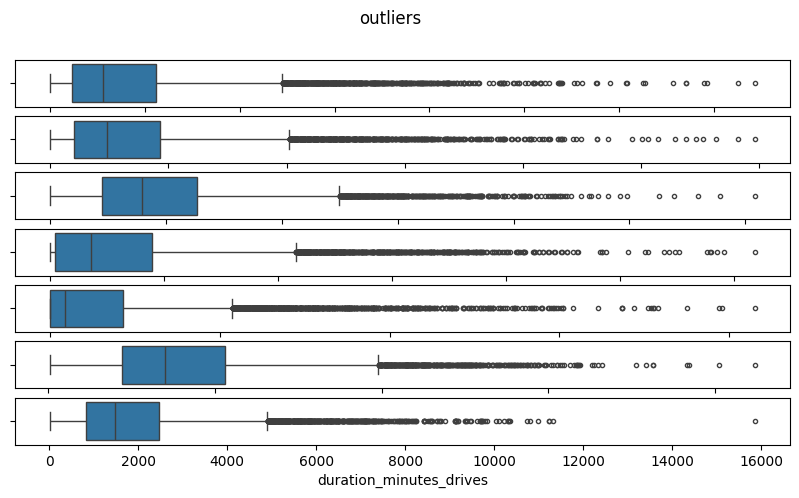

In [8]:
fig, axes = plt.subplots(7, 1, figsize=(10, 5))
fig.suptitle('outliers')

sns.boxplot(ax = axes[0], x = df["sessions"], fliersize = 3 )
sns.boxplot(ax = axes[1], x = df["drives"], fliersize = 3 )
sns.boxplot(ax = axes[2], x = df["total_sessions"], fliersize = 3 )
sns.boxplot(ax = axes[3], x = df["total_navigations_fav1"], fliersize = 3 )
sns.boxplot(ax = axes[4], x = df["total_navigations_fav2"], fliersize = 3 )
sns.boxplot(ax = axes[5], x = df["driven_km_drives"], fliersize = 3 )
sns.boxplot(ax = axes[6], x = df["duration_minutes_drives"], fliersize = 3 )
plt.show()


#### **`km_per_driving_day`**

Create a new column called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

In [9]:
# 1. Create `km_per_driving_day` column
df["km_per_driving_day"] = df["driven_km_drives"] / df["driving_days"]

# 2. Call `describe()` on the new column
df["km_per_driving_day"].describe()

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

##### Convert these values from infinity to zero.

In [10]:
# 1. Convert infinite values to zero
df.loc[df["km_per_driving_day"] == np.inf, "km_per_driving_day"] = 0

# 2. Confirm that it worked
df["km_per_driving_day"].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **`professional_driver`**

Create a new, binary feature called `professional_driver` :

* Users who had 60 or more drives and drove on 15+ days in the last month : `1` 

* Else : `0` .

In [11]:
df["professional_driver"] = np.where((df["drives"] >= 60) & (df["driving_days"] >= 15), 1, 0)



In [12]:
# 1. Check count of professionals and non-professionals
print(df["professional_driver"].value_counts())

# 2. Check in-class churn rate
df.groupby(["professional_driver"])["label"].value_counts(normalize = True)

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int32  
dtypes: float64(4), int32(1

In [14]:
# Drop rows with missing data in `label` column
df = df.dropna(subset = ["label"])

In [15]:
# Impute outliers
for column in ["sessions", "drives", "total_sessions", "total_navigations_fav1", "total_navigations_fav2", "driven_km_drives", "duration_minutes_drives"]:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold

In [16]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


In [17]:
data_minority = df[df["label"] == "churned"]
data_majority = df[df["label"] == "retained"]
data_minority_upsampled = resample(data_minority,
                                   replace=True,                 # to sample with replacement
                                   n_samples=len(data_majority), # to match majority class
                                   random_state=0)


df = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)
df["label"].value_counts()

label
retained    11763
churned     11763
Name: count, dtype: int64

Change the data type of the `label` column to be binary.

* `retained` users : `0`  

* `churned` users. : `1` 


In [18]:
# Create binary `label2` column
df["label2"] = np.where(df["label"] == "churned", 1, 0)
df[["label", "label2"]].value_counts()

label     label2
churned   1         11763
retained  0         11763
Name: count, dtype: int64

In [19]:
# Generate a correlation matrix
df.corr(method = "pearson", numeric_only = True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996949,0.608084,0.010346,0.002639,0.012281,0.011506,-0.007032,0.015669,0.012870,0.005277,0.366016,0.038094
drives,0.996949,1.000000,0.606651,0.009457,0.001847,0.013239,0.012120,-0.006212,0.015194,0.012222,0.005833,0.367335,0.039666
total_sessions,0.608084,0.606651,1.000000,0.007536,0.001208,0.012313,0.005804,-0.001913,0.010318,0.009950,-0.007438,0.220410,0.029463
n_days_after_onboarding,0.010346,0.009457,0.007536,1.000000,-0.011587,-0.012614,-0.010249,-0.017961,0.007186,0.007281,0.004343,0.002410,-0.164988
total_navigations_fav1,0.002639,0.001847,0.001208,-0.011587,1.000000,-0.005412,-0.005365,0.008384,0.020532,0.019839,-0.005513,0.003781,0.059385
total_navigations_fav2,0.012281,0.013239,0.012313,-0.012614,-0.005412,1.000000,-0.003791,-0.005212,-0.016901,-0.008991,0.020343,0.008118,0.014720
driven_km_drives,0.011506,0.012120,0.005804,-0.010249,-0.005365,-0.003791,1.000000,0.705597,-0.004904,-0.009706,0.359389,-0.017195,0.032159
duration_minutes_drives,-0.007032,-0.006212,-0.001913,-0.017961,0.008384,-0.005212,0.705597,1.000000,-0.020468,-0.024577,0.261673,-0.030149,0.061935
activity_days,0.015669,0.015194,0.010318,0.007186,0.020532,-0.016901,-0.004904,-0.020468,1.000000,0.952363,-0.373276,0.473450,-0.395695
driving_days,0.012870,0.012222,0.009950,0.007281,0.019839,-0.008991,-0.009706,-0.024577,0.952363,1.000000,-0.383377,0.490779,-0.386612


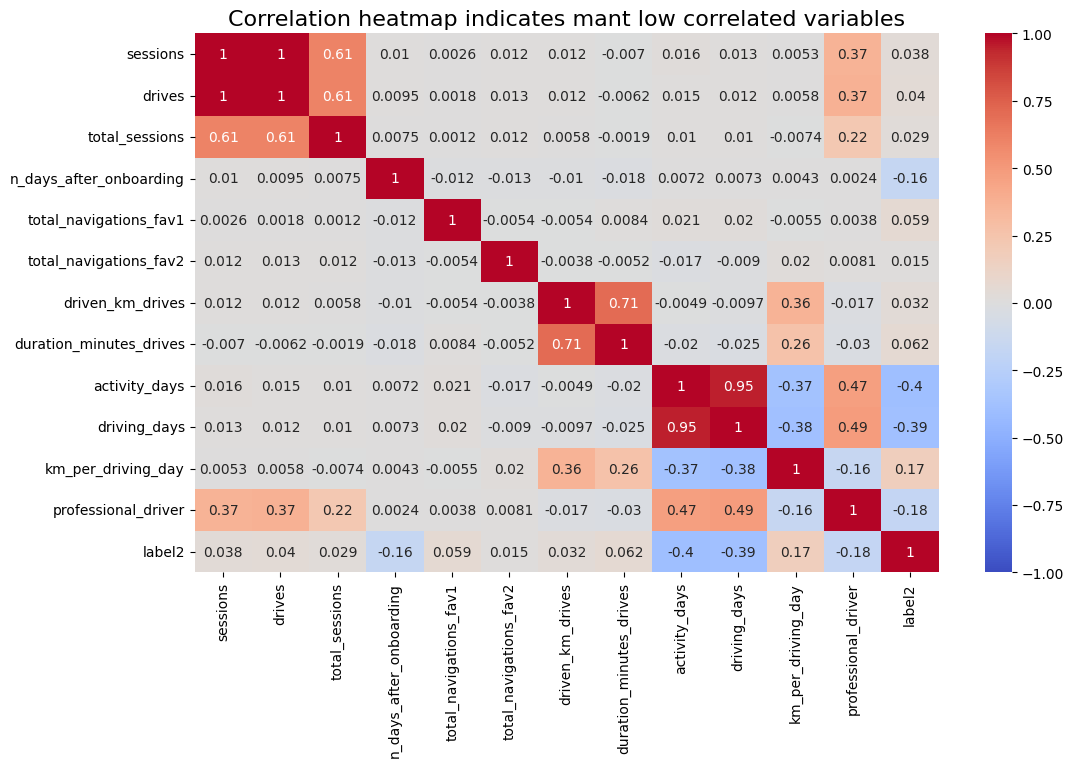

In [20]:
# Plot correlation heatmap
plt.figure(figsize = (12, 7))
sns.heatmap(df.corr(method = "pearson", numeric_only = True),vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")
plt.title("Correlation heatmap indicates mant low correlated variables", fontsize = 16)
plt.show()

`sessions` and `drives`, `driving_days` and `activity_days` are multicollinear with each other

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` user : `0`
* `iPhone` user : `1`

In [21]:
# Create new `device2` variable
df["device2"] = np.where(df["device"] == "Android", 0, 1)
df[["device", "device2"]].value_counts()

device   device2
iPhone   1          15202
Android  0           8324
Name: count, dtype: int64

In [22]:
# Isolate predictor variables
x = df.drop(columns = ["label", "label2", "device", "sessions", "driving_days"])

In [23]:
# Isolate target variable
y = df["label2"]


 Because the target class is imbalanced (82% retained vs. 18% churned).
 
 Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [24]:
# Perform the train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 42)

In [25]:
# Use .head()
x_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
6207,126,205.828865,1262,23,0,3464.684614,1397.676503,2,1732.342307,0,0
9557,70,167.071878,2009,41,0,3169.098185,2603.807484,7,528.183031,0,1
15021,200,343.936489,101,202,0,8898.716275,4668.180092,14,1130.020086,0,0
3645,32,94.505857,3416,0,19,3395.945981,1391.403865,12,565.990997,0,0
15980,4,28.664163,493,375,35,3427.644795,1181.756971,16,263.664984,0,0



It is important to add `penalty = None` since the predictors are unscaled.



In [26]:
model = LogisticRegression(penalty = None)
model.fit(x_train, y_train)


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

In [27]:
# Generate predictions on X_test
y_preds = model.predict(x_test)

In [28]:
# Check the coeficients of each variables
feature_importance = pd.DataFrame({"Coefficient" : model.coef_[0]}, index = x.columns).sort_values(by = "Coefficient", ascending = False)
feature_importance

,Coefficient
total_navigations_fav2,0.002639
drives,0.002210
total_navigations_fav1,0.002011
total_sessions,0.001453
device2,0.000184
duration_minutes_drives,0.000167
km_per_driving_day,0.000095
driven_km_drives,0.000044
n_days_after_onboarding,-0.000201
professional_driver,-0.001583


Text(0.5, 1.0, 'Feature importance')

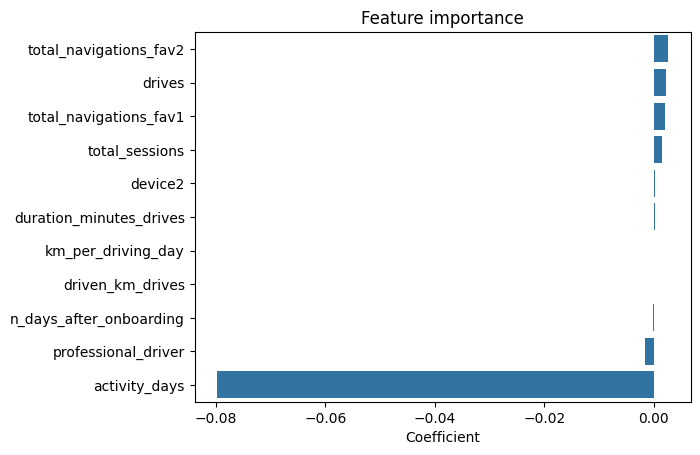

In [29]:
# Plot the feature importances
sns.barplot(feature_importance["Coefficient"], orient = "h")
plt.title("Feature importance")

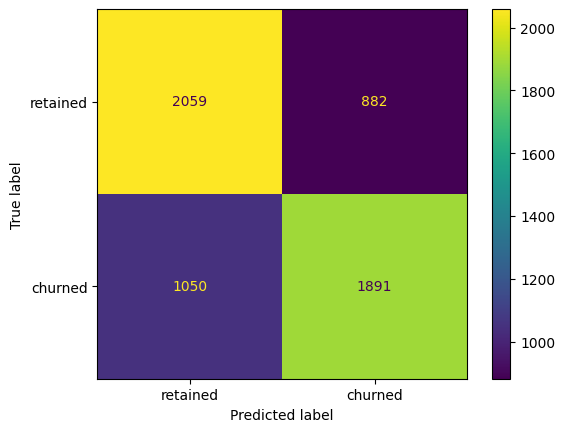

In [30]:
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, 
                            display_labels = ["retained", "churned"])
disp.plot()

In [31]:
# Create a classification report
target_labels = ["retained", "churned"]
print(classification_report(y_test, y_preds, target_names = target_labels))

              precision    recall  f1-score   support

    retained       0.66      0.70      0.68      2941
     churned       0.68      0.64      0.66      2941

    accuracy                           0.67      5882
   macro avg       0.67      0.67      0.67      5882
weighted avg       0.67      0.67      0.67      5882

